In [1]:
import numpy as np
import pandas as pd

In [2]:
Livecells = pd.read_csv('Objects_Population - Life Stain.txt',delimiter="\t")

In [3]:
Livecells.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Compound,Concentration,Cell Type,Cell Count,Life Stain - Intensity live Mean,Life Stain - nucleus staining Mean,Life Stain - Object No in nucleus,Unnamed: 16
0,2,2,1,0,1,1,20,12,"[4,1,35,28]",NaN,NaN,NaN,NaN,3617.53,3982.18,1,NaN
1,2,2,1,0,1,2,139,8,"[126,1,172,16]",NaN,NaN,NaN,NaN,3237.05,4206.38,2,NaN
2,2,2,1,0,1,3,185,13,"[165,1,206,30]",NaN,NaN,NaN,NaN,3985.90,4852.29,3,NaN
3,2,2,1,0,1,4,541,16,"[513,1,572,50]",NaN,NaN,NaN,NaN,4058.24,4544.25,4,NaN
4,2,2,1,0,1,5,584,23,"[552,1,613,70]",NaN,NaN,NaN,NaN,4177.87,4421.11,5,NaN


In [4]:
Livecells = Livecells.drop(Livecells.columns[[2,3,4,6,7,8,9,10,11,12,16]],axis = 1)

In [5]:
Livecells['Row'] = Livecells['Row'].apply(str)
Livecells['Column'] = Livecells['Column'].apply(str)

In [6]:
Livecells['Tm'] = Livecells['Row'].replace({'2':'Gox','3':'Empty','4':'Gox','5':'Empty','6':'Gox','7':'Empty'})

In [7]:
Livecells['Glu'] = Livecells['Row'].replace({'2':'0.17','3':'0.17','4':'0.8','5':'0.8','6':'1.4','7':'1.4'})

In [8]:
Livecells['Vesciles'] = Livecells['Column'].replace({'2':'conc1','3':'conc1','4':'conc1','5':'conc2','6':'conc2','7':'conc2','8':'conc3','9':'conc3','10':'conc3'})

In [9]:
Livecells.head()

,Row,Column,Object No,Life Stain - Intensity live Mean,Life Stain - nucleus staining Mean,Life Stain - Object No in nucleus,Tm,Glu,Vesciles
0,2,2,1,3617.53,3982.18,1,Gox,0.17,conc1
1,2,2,2,3237.05,4206.38,2,Gox,0.17,conc1
2,2,2,3,3985.90,4852.29,3,Gox,0.17,conc1
3,2,2,4,4058.24,4544.25,4,Gox,0.17,conc1
4,2,2,5,4177.87,4421.11,5,Gox,0.17,conc1


In [10]:
lowglu_c1 = Livecells [(Livecells['Glu']== '0.17') & (Livecells['Vesciles']== 'conc1')]
highglu_c1 = Livecells[(Livecells['Glu']== '1.4')&(Livecells['Vesciles']== 'conc1')]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
highglu_c1[(highglu_c1['Tm']=='Gox')]['Life Stain - Intensity live Mean'].describe()

count    7954.000000
mean     2108.803582
std       439.033146
min      1076.590000
25%      1805.570000
50%      2018.205000
75%      2326.265000
max      6526.820000
Name: Life Stain - Intensity live Mean, dtype: float64

In [13]:
highglu_c1[(highglu_c1['Tm']=='Empty')]['Life Stain - Intensity live Mean'].describe()

count    24996.000000
mean      3725.931890
std        972.874365
min       1176.300000
25%       3053.625000
50%       3595.280000
75%       4257.552500
max      13602.800000
Name: Life Stain - Intensity live Mean, dtype: float64

<BarContainer object of 32950 artists>

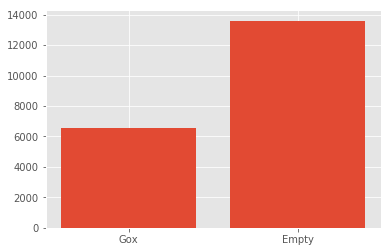

In [14]:
plt.style.use('ggplot')
plt.bar(highglu_c1['Tm'],highglu_c1['Life Stain - Intensity live Mean'])

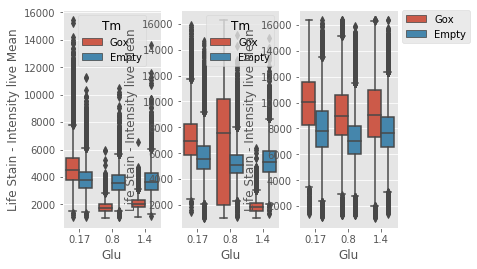

In [15]:
plt.subplot(1,3,1)
sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc1'])
plt.subplot(1,3,2)
sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc2'])
plt.subplot(1,3,3)
sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc3'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

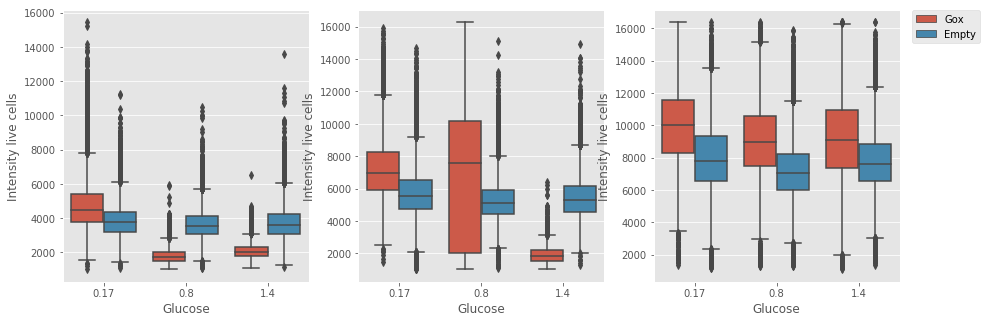

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
plot1 = sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc1'],ax=ax1).set(xlabel='Glucose',ylabel='Intensity live cells')
ax1.get_legend().remove()
plot2 = sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc2'],ax=ax2).set(xlabel='Glucose',ylabel='Intensity live cells')
ax2.get_legend().remove()
plot3 = sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc3'],ax=ax3).set(xlabel='Glucose',ylabel='Intensity live cells')
ax3.get_legend().remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[Text(0,0.5,'Intensity live cells'),
 Text(0.5,0,'Glucose'),
 Text(0.5,1,'Conc3')]

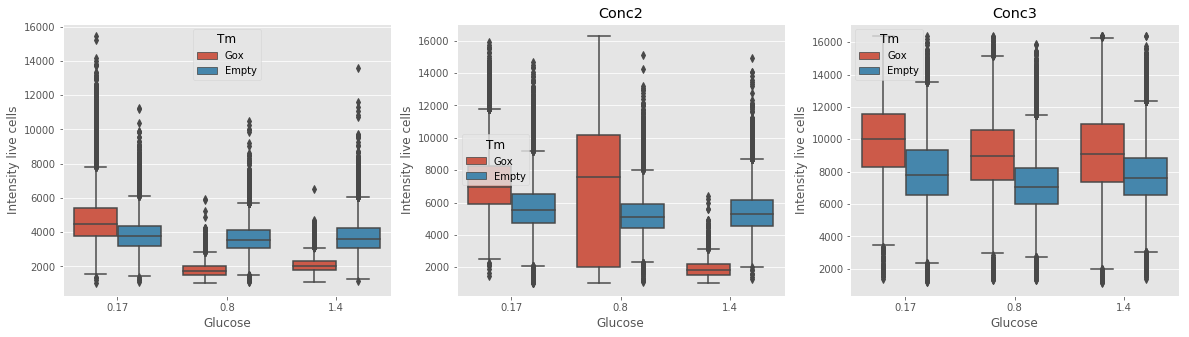

In [17]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc1'],ax=axes[0]).set(xlabel='Glucose',ylabel='Intensity live cells')

sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc2'],ax=axes[1]).set(xlabel='Glucose',ylabel='Intensity live cells',title='Conc2')

sns.boxplot(x='Glu',y='Life Stain - Intensity live Mean',hue = 'Tm',data=Livecells[Livecells['Vesciles']=='conc3'],ax=axes[2]).set(xlabel='Glucose',ylabel='Intensity live cells',title='Conc3')



In [18]:
pylab.rcParams?

Object `pylab.rcParams` not found.


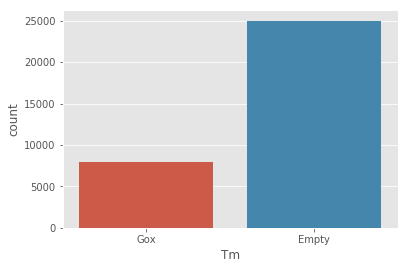

In [19]:
sns.countplot(x='Tm',data=highglu_c1)

In [20]:
g = highglu_c1['Life Stain - Intensity live Mean'][highglu_c1['Life Stain - Intensity live Mean']>5000]

In [21]:
g.count()

2486

In [22]:
deadcells = pd.read_csv('Objects_Population - Dead Stain.txt',delimiter="\t")

In [23]:
deadcells.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Compound,Concentration,Cell Type,Cell Count,Dead Stain - Intensity dead Mean,Dead Stain - Object No in Dead Stain All,Unnamed: 15
0,2,2,1,0,1,1,57,194,"[45,182,69,207]",NaN,NaN,NaN,NaN,3002.84,1,NaN
1,2,2,1,0,1,2,592,214,"[589,210,595,219]",NaN,NaN,NaN,NaN,6551.13,2,NaN
2,2,2,1,0,1,3,751,243,"[747,240,756,247]",NaN,NaN,NaN,NaN,5909.26,3,NaN
3,2,2,1,0,1,4,554,274,"[551,271,558,279]",NaN,NaN,NaN,NaN,4329.98,4,NaN
4,2,2,1,0,1,5,288,461,"[285,457,291,466]",NaN,NaN,NaN,NaN,2475.08,5,NaN


In [24]:
livecells = pd.read_csv('Objects_Population - Life Stain.txt',delimiter="\t")

In [25]:
livecells.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Compound,Concentration,Cell Type,Cell Count,Life Stain - Intensity live Mean,Life Stain - nucleus staining Mean,Life Stain - Object No in nucleus,Unnamed: 16
0,2,2,1,0,1,1,20,12,"[4,1,35,28]",NaN,NaN,NaN,NaN,3617.53,3982.18,1,NaN
1,2,2,1,0,1,2,139,8,"[126,1,172,16]",NaN,NaN,NaN,NaN,3237.05,4206.38,2,NaN
2,2,2,1,0,1,3,185,13,"[165,1,206,30]",NaN,NaN,NaN,NaN,3985.90,4852.29,3,NaN
3,2,2,1,0,1,4,541,16,"[513,1,572,50]",NaN,NaN,NaN,NaN,4058.24,4544.25,4,NaN
4,2,2,1,0,1,5,584,23,"[552,1,613,70]",NaN,NaN,NaN,NaN,4177.87,4421.11,5,NaN


In [26]:
livecells = livecells.drop(livecells.columns[[2,3,4,5,6,7,9,10,11,12,15,16]], axis=1)

In [27]:
deadcells = deadcells.drop(deadcells.columns[[2,3,4,5,6,7,9,10,11,12,14,15]], axis=1)

In [28]:
mergedf = pd.merge(livecells,deadcells,on = 'Bounding Box')

In [29]:
mergedf

,Row_x,Column_x,Bounding Box,Life Stain - Intensity live Mean,Life Stain - nucleus staining Mean,Row_y,Column_y,Dead Stain - Intensity dead Mean
0,3,3,"[1,999,36,1022]",3007.87,4780.65,6,7,2193.34
1,3,11,"[1,384,22,408]",13518.70,3221.46,6,7,3227.77
2,5,8,"[1,323,13,335]",5351.14,3829.26,4,3,3724.66
3,6,3,"[63,939,75,953]",1948.17,4499.86,6,3,2514.82
4,6,4,"[1346,1001,1358,1015]",1881.39,4390.13,4,4,2400.78
5,7,3,"[1,1009,12,1022]",4599.73,4933.65,6,3,2639.77


In [30]:
Livecells.head()

,Row,Column,Object No,Life Stain - Intensity live Mean,Life Stain - nucleus staining Mean,Life Stain - Object No in nucleus,Tm,Glu,Vesciles
0,2,2,1,3617.53,3982.18,1,Gox,0.17,conc1
1,2,2,2,3237.05,4206.38,2,Gox,0.17,conc1
2,2,2,3,3985.90,4852.29,3,Gox,0.17,conc1
3,2,2,4,4058.24,4544.25,4,Gox,0.17,conc1
4,2,2,5,4177.87,4421.11,5,Gox,0.17,conc1


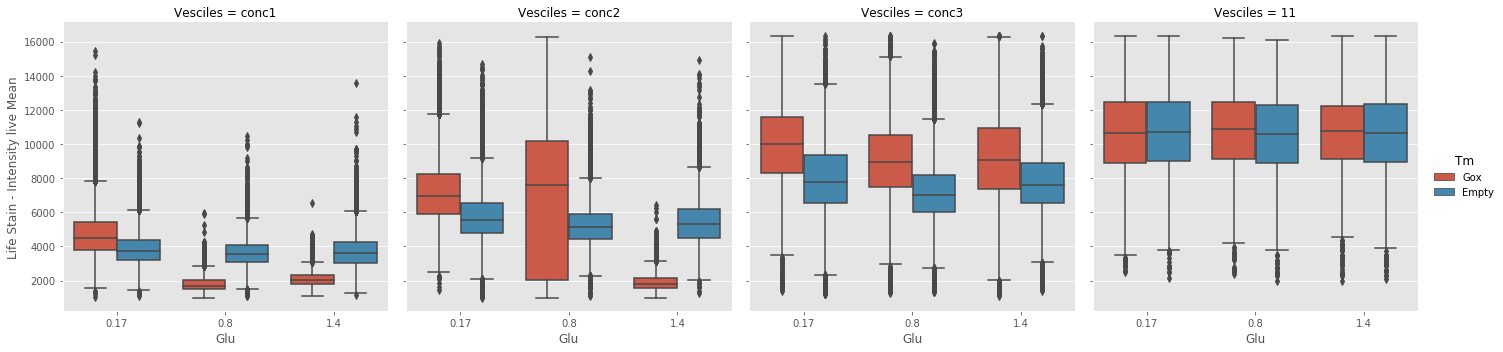

In [31]:
sns.catplot(x='Glu', y='Life Stain - Intensity live Mean',hue='Tm',col='Vesciles',data=Livecells,kind='box')